In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import make_classification
import keras 
import keras.backend as K
import innvestigate
from keras.models import Model

Using TensorFlow backend.


In [118]:
X, y = make_classification(n_samples=5000, n_features=16, n_informative=8, n_redundant=0, shuffle=False)

In [119]:
from sklearn.preprocessing import OneHotEncoder

In [120]:
le = OneHotEncoder()

le = le.fit(y.reshape(-1,1))
y_bin = le.transform(y.reshape(-1,1))

/home/chschrec/.local/share/virtualenvs/interpret-R0ok2QRq/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [121]:
def cut_last_layer(model, n=1):
    return Model(inputs=model.inputs, outputs=model.layers[-1-n].output)


In [122]:
model = keras.Sequential(layers=[
    keras.layers.Dense(units=32, activation=keras.activations.relu, input_shape=(16,)),
    keras.layers.Dense(units=16, activation=keras.activations.relu),
    keras.layers.Dense(units=2, activation=keras.activations.softmax)
])


In [123]:
model.compile(optimizer='Adam',
              loss=keras.losses.categorical_crossentropy,
              metrics=[keras.metrics.categorical_accuracy])

In [124]:
X_train = X[:4000]

In [125]:
X_test = X[4000:]

In [126]:
y_train = y_bin.todense()[:4000]

In [127]:
y_test = y_bin.todense()[4000:]

In [128]:
model.fit(X_train, y_train, epochs=30)

Epoch 1/30
4000/4000 [==============================] - 1s 314us/step - loss: 0.4705 - categorical_accuracy: 0.7765
Epoch 2/30
4000/4000 [==============================] - 0s 101us/step - loss: 0.2861 - categorical_accuracy: 0.8907
Epoch 3/30
4000/4000 [==============================] - 0s 111us/step - loss: 0.2090 - categorical_accuracy: 0.9305
Epoch 4/30
4000/4000 [==============================] - 0s 103us/step - loss: 0.1719 - categorical_accuracy: 0.9420
Epoch 5/30
4000/4000 [==============================] - 0s 122us/step - loss: 0.1526 - categorical_accuracy: 0.9510
Epoch 6/30
4000/4000 [==============================] - 1s 129us/step - loss: 0.1405 - categorical_accuracy: 0.9560
Epoch 7/30
4000/4000 [==============================] - 1s 138us/step - loss: 0.1319 - categorical_accuracy: 0.9587
Epoch 8/30
4000/4000 [==============================] - 1s 140us/step - loss: 0.1241 - categorical_accuracy: 0.9627
Epoch 9/30
4000/4000 [==============================] - 1s 140us/step - 

In [129]:
new_model = innvestigate.utils.model_wo_softmax(model)

In [75]:
a = innvestigate.analyzer.relevance_based.relevance_analyzer.LRPAlpha1Beta0(new_model, neuron_selection_mode='index')

In [76]:
analysis_n0 = a.analyze(X_test, 0)
analysis_n1 = a.analyze(X_test, 1)

In [80]:
np.sum(np.abs(analysis_n0), axis=0)

array([359.06384, 912.45526, 202.21404, 125.46724, 210.218  , 163.81822,
       197.5632 , 178.98962, 175.97333, 190.84613, 235.2155 , 229.51964,
       199.56885, 219.28465, 140.60507, 141.37297], dtype=float32)

In [79]:
np.sum(np.abs(analysis_n1), axis=0)

array([182.56732 , 483.38803 ,  90.52731 ,  38.686573,  85.86376 ,
        70.81913 ,  78.69268 ,  65.55648 ,  71.49202 ,  83.01515 ,
        93.287415,  87.41766 ,  90.61343 ,  76.45172 ,  64.11714 ,
        59.97343 ], dtype=float32)

In [26]:
(np.sum(np.abs(analysis_n0), axis=0) + np.sum(np.abs(analysis_n1), axis=0))

array([ 99.339554, 140.14102 ,  96.515594, 139.5579  , 124.68625 ,
       139.09119 , 113.11871 , 149.26859 ,  83.30373 , 124.18385 ,
       124.54954 , 149.53291 , 103.107574, 138.25873 , 166.87585 ,
        78.31903 , 119.147316,  83.98619 , 117.44177 , 109.08168 ,
       143.58737 , 110.34688 , 127.975266, 105.47957 , 131.32751 ,
        99.38975 , 139.80046 , 299.96362 , 151.81097 , 122.50618 ,
       104.439224, 108.18065 , 499.69598 , 127.15139 , 141.4978  ,
       296.97452 , 123.133316, 106.046425, 113.658005, 112.66585 ,
       148.85075 ,  97.67736 , 137.21814 , 125.38243 , 130.81549 ,
       129.20818 , 100.69293 , 106.9875  , 124.96744 ,  91.64963 ,
       122.73762 , 157.88995 ,  97.26775 ,  89.47073 , 128.26608 ,
       103.01664 , 145.90744 ,  99.15196 , 115.18309 , 146.1477  ,
        85.938255, 128.76228 ,  91.09634 ,  96.15109 ], dtype=float32)

In [27]:
np.argsort((np.sum(np.abs(analysis_n0), axis=0) + np.sum(np.abs(analysis_n1), axis=0)))

array([15,  8, 17, 60, 53, 62, 49, 63,  2, 52, 41, 57,  0, 25, 46, 55, 12,
       30, 23, 37, 47, 31, 19, 21, 39,  6, 38, 58, 18, 16, 29, 50, 36,  9,
       10,  4, 48, 43, 33, 22, 54, 61, 45, 44, 24, 42, 13,  5,  3, 26,  1,
       34, 20, 56, 59, 40,  7, 11, 28, 51, 14, 35, 27, 32])

In [ ]:
a1 = innvestigate.analyzer.relevance_based.relevance_analyzer.LRPAlpha1Beta0(cut_last_layer(model), neuron_selection_mode='index')

In [ ]:
a1.analyze(X_test, 2)[0]

In [ ]:
a2 = innvestigate.analyzer.relevance_based.relevance_analyzer.LRPAlpha1Beta0(cut_last_layer(model, n=2), neuron_selection_mode='index')

In [ ]:
count = 0
for arr in a2.analyze(X_test, 31):
    if np.sum(arr) == 0:
        count+=1

print(count)

In [ ]:
np.sum(a2.analyze(X_test, 31), axis=0)

In [28]:
(np.sum(a.analyze(X_test, 0), axis=0))

array([ 24.198978 ,   5.4330654,  18.353344 ,  20.21186  , 147.38112  ,
        21.705736 ,  19.620811 ,   1.3526926, 226.99542  ,  17.773066 ,
        13.492573 ,  48.89484  ,  16.189135 ,  17.801525 ,  62.233307 ,
        21.422846 ,  20.286646 ,  22.040644 ,  18.90143  ,   4.624758 ,
        13.392555 ,  17.78278  ,  21.225489 ,  11.659458 ,  98.71338  ,
        15.310058 ,   8.918158 ,   8.277944 ,  16.667187 ,  17.214766 ,
        47.25463  ,  16.840668 ,  10.165367 ,  26.659868 ,  14.637087 ,
        19.321383 ,  18.544174 ,   3.6446671,  11.676939 ,  22.426533 ,
        19.399498 ,  16.564007 ,  17.04478  ,  12.790912 ,  27.558489 ,
        21.002686 ,  13.666864 ,  15.740488 ,  29.78971  ,  10.3110285,
         4.7441134,  21.16869  ,  12.333801 , 157.04886  ,  18.348265 ,
         9.556163 ,  19.191208 ,  23.25707  ,  14.356097 ,  79.90362  ,
         9.877087 ,  67.065315 ,  23.308184 ,  15.463832 ], dtype=float32)

In [ ]:
np.sum(a.analyze(X_test, 1)[0], axis=0)

In [ ]:
a.analyze(X_test, 1)[0]

In [131]:
dt_analysis = innvestigate.analyzer.DeepTaylor(new_model, neuron_selection_mode='index')

In [132]:
res_n0 = dt_analysis.analyze(X_test[np.asarray(y_test[:,0] == 1).reshape(1000)], 1)

In [74]:
np.sum(res_n0, axis=0)

array([0.5884302 , 4.1642203 , 0.53397393, 0.12489966, 0.17320484,
       0.29060334, 0.37110013, 0.33086884, 0.03110393, 0.20964508,
       0.2124901 , 0.32885295, 0.44075388, 0.46450096, 0.2945367 ,
       0.3022653 ], dtype=float32)

In [69]:
X_test[np.asarray(y_test[:,0] == 1).reshape(4000)]

array([[ 2.81776381,  1.14494611, -0.43716025, ...,  0.01166994,
         0.49618419, -0.84541549],
       [-0.56113835, -2.04683639,  1.50387699, ...,  1.06602879,
         0.59907378, -0.91454125],
       [ 0.3676762 ,  0.30938325,  0.31790342, ...,  0.84448119,
         0.43929896, -0.15437855],
       ...,
       [ 2.00269476, -1.16201906, -0.13187375, ..., -0.40881691,
        -0.45981859, -0.28527456],
       [-0.91613436, -0.89379655, -0.6858576 , ..., -0.85685856,
         0.81398013, -1.41128751],
       [ 0.81761772, -0.66103599, -0.73146746, ..., -3.83618185,
        -1.13414511,  0.28349711]])

In [34]:
count = 0
for val in np.asarray(y_test[:,0] == 1).reshape(4000):
    if not val:
        count +=1
        
count

1990

Feature ranking:
1. feature 1 (0.192702)
2. feature 2 (0.117322)
3. feature 0 (0.101295)
4. feature 3 (0.095844)
5. feature 4 (0.090630)
6. feature 6 (0.077479)
7. feature 7 (0.072666)
8. feature 5 (0.059570)
9. feature 10 (0.024608)
10. feature 14 (0.024495)
11. feature 15 (0.024105)
12. feature 9 (0.024093)
13. feature 11 (0.023980)
14. feature 13 (0.023904)
15. feature 8 (0.023743)
16. feature 12 (0.023565)


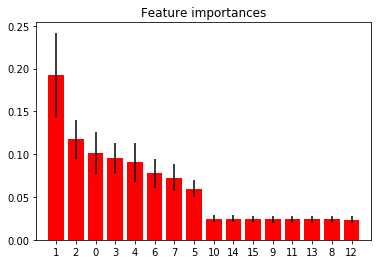

In [130]:
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier


# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=500,
                              random_state=1)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()


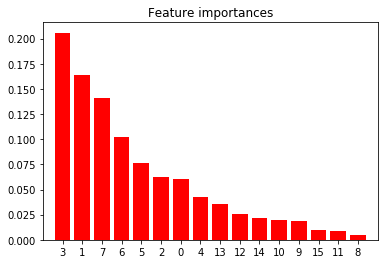

In [135]:
summed_res = np.sum(res_n0, axis=0)
norm_summed_res = summed_res/np.sum(summed_res)

indices = np.argsort(norm_summed_res)[::-1]

plt.figure()
plt.title("Feature importances")

plt.bar(range(X.shape[1]), norm_summed_res[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [82]:
res_n0.shape[1]

16

In [90]:
from sklearn.preprocessing import Normalizer

In [92]:

norm_summed_res

array([0.14130622, 1.        , 0.12822904, 0.02999353, 0.04159358,
       0.06978577, 0.08911635, 0.07945517, 0.00746933, 0.05034438,
       0.05102758, 0.07897107, 0.10584307, 0.11154572, 0.07073034,
       0.07258628], dtype=float32)

In [96]:
X_train[0][0] = np.NaN

In [117]:
np.inf * 0

nan